# Datan analysointi K2021 - Tehtävät kerta 7

**Opiskelijan nimi: Riikka Kokko**

Harjoituskerran 7 tehtävistä palautetaan Moodleen tiedosto muodossa **harjoitus7_etunimi_sukunimi.ipynb**. Jokaiseen vastattuun tehtävään tulee ajaa niiden ratkaisut näkyville. Vain ajetut ratkaisut voidaan arvioida. Tehtäväsi arvioidaan pistein:

* 1,0 p. Vastaus on täysin oikein.
* 0,5 p. Vastaus on osittain oikein.
* 0 p. Vastaus on väärin.

**Tehtävissä ei tule käyttää silmukkarakenteita.** Sen sijaan tämän harjoituksen tehtävät kirjoitetaan ilman funktiorakennetta (skripti muodossa).


## 1. Lineaarinen regressio

Eräs kappale on tasaisesti kiihtyvässä liikkeessä ja siitä on mitattu aika liikkeelle lähdöstä sekunteina, paikka yksiköissä $m$, nopeus yksiköissä $m/s$ ja kiihtyvyys yksiköissä $m/s^2$. Tee alla olevan esimerkkikuvan kaltainen kuva, jossa
* olet käsitellyt datan lukemalla sen DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv),
* jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,
* vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty nopeus 'Velocity v / m/s',
* mitatut arvot ('Time t / s','Velocity v / m/s') näkyvät sinisellä värillä 'x' merkillä,
* mitattuihin arvoihin on sovitettu pienimmän neliösumman menetelmällä suora,
* suoran yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja suoran yhtälön kertoimet on esitetty neljän desimaalin tarkkuudella,
* mitattujen aika 'Time t / s' ja nopeus 'Velocity v / m/s' arvoista on laskettu korrelaatiokerroin ja kovarianssi,
* kovarianssi (Covariance) ja korrelaatiokerroin (Correlation) on pyöristetty kolmen desimaalin tarkkuuteen ja esitetty kuvassa kuvaan lisätyn tekstin avulla.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/tehtava1.svg" width="450"/>

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### olet käsitellyt datan lukemalla sen DataFrameen url:sta,

In [328]:
df=pd.read_csv('https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv', sep = ";")
df.head()

,Time t / s,Time t / s.1,Path s_A1 / m,Velocity v / m/s,Acceleration a / m/s^2
0,0,"-0,0800179444444442","-4,76388896664126E-06","4,29454052122595E-08","0,0491092850476261"
1,"0,05","-0,0400026805555553","-7,14583330352347E-06","0,00393170052260784","0,155586511566299"
2,"0,1","-7,51388888886595E-06","0,000309652777820135","0,0124462828525324","0,196129234097381"
3,"0,15","0,0399909305555557","0,000988506944448408","0,0196206763200274","0,171925504095637"
4,"0,2","0,0799937222222225","0,00187935416665552","0,0262004709976547","0,164114422898518"


In [329]:
df['Time t / s'] = df['Time t / s'].str.replace(',','.')
df['Time t / s.1'] = df['Time t / s.1'].str.replace(',','.')
df['Path s_A1 / m'] = df['Path s_A1 / m'].str.replace(',','.')
df['Velocity v / m/s'] = df['Velocity v / m/s'].str.replace(',','.')
df['Acceleration a / m/s^2'] = df['Acceleration a / m/s^2'].str.replace(',','.')

In [330]:
df['Time t / s'] = df['Time t / s'].astype(float)
df['Time t / s.1'] = df['Time t / s.1'].astype(float)
df['Path s_A1 / m'] = df['Path s_A1 / m'].astype(float)
df['Velocity v / m/s'] = df['Velocity v / m/s'].astype(float)
df['Acceleration a / m/s^2'] = df['Acceleration a / m/s^2'].astype(float)
type(df['Time t / s'][0])

numpy.float64

In [331]:
df.head()

,Time t / s,Time t / s.1,Path s_A1 / m,Velocity v / m/s,Acceleration a / m/s^2
0,0.00,-0.080018,-0.000005,4.294541e-08,0.049109
1,0.05,-0.040003,-0.000007,3.931701e-03,0.155587
2,0.10,-0.000008,0.000310,1.244628e-02,0.196129
3,0.15,0.039991,0.000989,1.962068e-02,0.171926
4,0.20,0.079994,0.001879,2.620047e-02,0.164114


#### jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,

In [332]:
df=df.fillna(0)

In [333]:
#df = df.astype(float)
#df = df.fillna(method='ffill')

#### vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty nopeus 'Velocity v / m/s',

In [334]:
new_df = df.copy()
new_df = new_df[['Time t / s', 'Velocity v / m/s']].copy()
new_df.head()

,Time t / s,Velocity v / m/s
0,0.00,4.294541e-08
1,0.05,3.931701e-03
2,0.10,1.244628e-02
3,0.15,1.962068e-02
4,0.20,2.620047e-02


#### mitattuihin arvoihin on sovitettu pienimmän neliösumman menetelmällä suora,

In [335]:
x=new_df['Time t / s']
y=new_df['Velocity v / m/s']

In [336]:
from sklearn.linear_model import LinearRegression
malli=LinearRegression()
x = new_df['Time t / s'].to_frame()  # muutetaan DataFrameksi
y = new_df['Velocity v / m/s']
malli.fit(x,y)

LinearRegression()

In [337]:
print(malli.coef_)  # kulmakerroin
print(malli.intercept_) # vakiotermi

[0.11382752]
0.01525302232028114


In [338]:
print(malli.score(x,y))
# toisaalta
print(new_df['Time t / s'].corr(new_df['Velocity v / m/s'])**2)

0.8748157742434561
0.874815774243456


In [339]:
#new_df['fitted']=0.1138*new_df['Time t / s']+0.0153
#new_df.head()

#### suoran yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja suoran yhtälön kertoimet on esitetty neljän desimaalin tarkkuudella,

In [340]:
new_df.round(4) 
new_df.head()

,Time t / s,Velocity v / m/s
0,0.00,4.294541e-08
1,0.05,3.931701e-03
2,0.10,1.244628e-02
3,0.15,1.962068e-02
4,0.20,2.620047e-02


#### mitattujen aika 'Time t / s' ja nopeus 'Velocity v / m/s' arvoista on laskettu korrelaatiokerroin ja kovarianssi,

In [341]:
korrelaatio=df['Time t / s'].corr(df['Velocity v / m/s'])
korrelaatio = float("{:.3f}".format(korrelaatio))
korrelaatio

0.935

In [342]:
kovarianssi=df['Time t / s'].cov(df['Velocity v / m/s'])
kovarianssi= float("{:.3f}".format(kovarianssi))
kovarianssi

0.199

#### vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty nopeus 'Velocity v / m/s',
#### mitatut arvot ('Time t / s','Velocity v / m/s') näkyvät sinisellä värillä 'x' merkillä,

#### kovarianssi (Covariance) ja korrelaatiokerroin (Correlation) on pyöristetty kolmen desimaalin tarkkuuteen ja esitetty kuvassa kuvaan lisätyn tekstin avulla

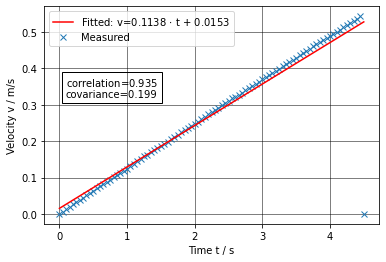

In [343]:
plt.plot(x, y, 'x', label='Measured')
plt.plot(x, res.intercept + res.slope*x, 'r', label='Fitted: v=0.1138 $\cdot$ t + 0.0153')

x1 = new_df["Time t / s"]
y1 = new_df["Velocity v / m/s"]
#plt.plot(x1, y1, 'xb', label = "Measured")
#x2 = new_df["Time t / s"]
#y2 = new_df["fitted"]
# plotting the line 2 points 
#plt.plot(x2, y2, 'r', label = "Fitted: v=0.1138 $\cdot$ t + 0.0153")
plt.xlabel('Time t / s')
# Set the y axis label of the current axis.
plt.ylabel('Velocity v / m/s')
plt.grid(color='black', linestyle='-', linewidth = 0.5)
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
t='correlation='+str(round(korrelaatio,3))+'$^{}$\ncovariance=' + str(round(kovarianssi, 3))
plt.text(0.09,0.32,t, color='black', bbox=dict(facecolor='none', edgecolor='black'))

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)

plt.show()


## 2. Muuttujien muunnokset ja lineaarinen regressio

Eräs kappale on tasaisesti kiihtyvässä liikkeessä ja siitä on mitattu aika liikkeelle lähdöstä sekunteina, paikka yksiköissä $m$, nopeus yksiköissä $m/s$ ja kiihtyvyys yksiköissä $m/s^2$. Tee alla olevan esimerkkikuvan kaltainen kuva, jossa
* olet käsitellyt datan lukemalla sen DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv),
* jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,
* vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty kappaleen paikka 'Path s_A1 / m',
* mitatut arvot ('Time t / s','Path s_A1 / m') näkyvät sinisellä värillä 'x' merkillä,
* mitattuihin arvoihin on sovitettu muuttujien muunnoksen ja lineaarisen regression avulla toisen asteen yhtälö,
* toisen asteen yhtälö (Fitted) ja mitatut arvot (Measured) on esitetty kuvan selitteessä ja toisen asteen yhtälön kertoimet on esitetty neljän desimaalin tarkkuudella.

Muuttujien muunnoksessa voit tehdä muunnoksen 
$$d=\sqrt{s},$$
missä $s$ on kappaleen paikka metreinä ja $d$ on uusi muuttuja, jonka avulla voidaan lineaarisen regression avulla laskea toisen asteen yhtälön termit.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/tehtava2.svg" width="450"/>

#### olet käsitellyt datan lukemalla sen DataFrameen url:sta,

In [345]:
df=pd.read_csv('https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Motion.csv', sep = ";")
df.head()

,Time t / s,Time t / s.1,Path s_A1 / m,Velocity v / m/s,Acceleration a / m/s^2
0,0,"-0,0800179444444442","-4,76388896664126E-06","4,29454052122595E-08","0,0491092850476261"
1,"0,05","-0,0400026805555553","-7,14583330352347E-06","0,00393170052260784","0,155586511566299"
2,"0,1","-7,51388888886595E-06","0,000309652777820135","0,0124462828525324","0,196129234097381"
3,"0,15","0,0399909305555557","0,000988506944448408","0,0196206763200274","0,171925504095637"
4,"0,2","0,0799937222222225","0,00187935416665552","0,0262004709976547","0,164114422898518"


In [346]:
df['Time t / s'] = df['Time t / s'].str.replace(',','.')
df['Time t / s.1'] = df['Time t / s.1'].str.replace(',','.')
df['Path s_A1 / m'] = df['Path s_A1 / m'].str.replace(',','.')
df['Velocity v / m/s'] = df['Velocity v / m/s'].str.replace(',','.')
df['Acceleration a / m/s^2'] = df['Acceleration a / m/s^2'].str.replace(',','.')

In [347]:
df['Time t / s'] = df['Time t / s'].astype(float)
df['Time t / s.1'] = df['Time t / s.1'].astype(float)
df['Path s_A1 / m'] = df['Path s_A1 / m'].astype(float)
df['Velocity v / m/s'] = df['Velocity v / m/s'].astype(float)
df['Acceleration a / m/s^2'] = df['Acceleration a / m/s^2'].astype(float)
type(df['Time t / s'][0])

numpy.float64

In [348]:
df.head()

,Time t / s,Time t / s.1,Path s_A1 / m,Velocity v / m/s,Acceleration a / m/s^2
0,0.00,-0.080018,-0.000005,4.294541e-08,0.049109
1,0.05,-0.040003,-0.000007,3.931701e-03,0.155587
2,0.10,-0.000008,0.000310,1.244628e-02,0.196129
3,0.15,0.039991,0.000989,1.962068e-02,0.171926
4,0.20,0.079994,0.001879,2.620047e-02,0.164114


#### jos datassa on NaN arvoja olet sijoittanut niiden paikalle arvon 0,

In [349]:
df=df.fillna(0)

#### vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty kappaleen paikka 'Path s_A1 / m',

In [350]:
new_df = df.copy()
new_df = new_df[['Time t / s', 'Path s_A1 / m']].copy()
new_df.head()

,Time t / s,Path s_A1 / m
0,0.00,-0.000005
1,0.05,-0.000007
2,0.10,0.000310
3,0.15,0.000989
4,0.20,0.001879


In [351]:
new_df=new_df.mask(new_df < 0)
new_df=new_df.fillna(0)
new_df.head()

,Time t / s,Path s_A1 / m
0,0.00,0.000000
1,0.05,0.000000
2,0.10,0.000310
3,0.15,0.000989
4,0.20,0.001879


#### mitattuihin arvoihin on sovitettu muuttujien muunnoksen ja lineaarisen regression avulla toisen asteen yhtälö,

In [352]:
x = new_df[['Time t / s']]
y = new_df['Path s_A1 / m']

In [353]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [354]:
model = LinearRegression().fit(x, y)

In [355]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)


coefficient of determination: 0.938039253184614
intercept: -0.16361317595689806
slope: [0.22243072]


In [356]:
#x = new_df[['Time t / s']]
x=pd.DataFrame(np.c_[np.square(new_df['Time t / s']), new_df['Time t / s']])
y = new_df['Path s_A1 / m']

malli=LinearRegression()
malli.fit(x,y)

print('Selityskerroin:',malli.score(x,y)) 

# vakiotermi ja kulmakertoimet
print('vakiotermi:',malli.intercept_)
print('kulmakertoimet:',malli.coef_)

Selityskerroin: 0.9999978821950628
vakiotermi: -0.00117220246477856
kulmakertoimet: [0.04867145 0.00340918]


In [175]:
new_df['fitted']=0.0494*(new_df['Time t / s']**2)+0.0007*new_df['Time t / s']+0.000
new_df.head()

,Time t / s,Path s_A1 / m,fitted
0,0.00,0.000000,0.000000
1,0.05,0.000000,0.000159
2,0.10,0.000310,0.000564
3,0.15,0.000989,0.001216
4,0.20,0.001879,0.002116


#### vaaka-akselilla on esitetty datasta aika 'Time t / s' ja pystyakselilla on esitetty kappaleen paikka 'Path s_A1 / m',
#### mitatut arvot ('Time t / s','Path s_A1 / m') näkyvät sinisellä värillä 'x' merkillä,

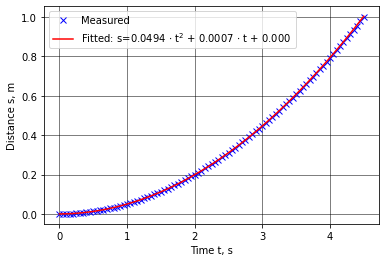

In [294]:
x1 = new_df["Time t / s"]
y1 = new_df["Path s_A1 / m"]
plt.plot(x1, y1, 'xb', label = "Measured")
x2 = new_df["Time t / s"]
y2 = new_df["fitted"]
# plotting the line 2 points 
plt.plot(x2, y2, 'r', label = "Fitted: s=0.0494 $\cdot$ t$^2$ + 0.0007 $\cdot$ t + 0.000 ")
plt.xlabel('Time t, s')
# Set the y axis label of the current axis.
plt.ylabel('Distance s, m')
plt.grid(color='black', linestyle='-', linewidth = 0.5)
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
plt.show()

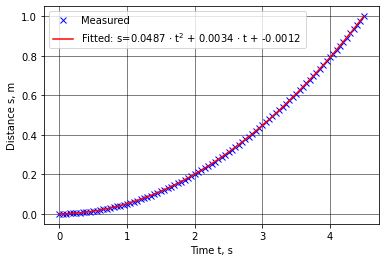

In [357]:
x1 = new_df["Time t / s"]
y1 = new_df["Path s_A1 / m"]
plt.plot(x1, y1, 'xb', label = "Measured")

# plotting the line 2 points 
new_df['fitted']=malli.coef_[0]*(new_df['Time t / s']**2)+malli.coef_[1]*new_df['Time t / s']+malli.intercept_
x2 = new_df["Time t / s"]
y2 = new_df["fitted"]
plt.plot(x2, y2, 'r', 
         label = f"Fitted: s={round(malli.coef_[0],4)} $\cdot$ t$^2$ + {round(malli.coef_[1],4)} $\cdot$ t + {round(malli.intercept_,4)} ")
plt.xlabel('Time t, s')
plt.ylabel('Distance s, m')
plt.grid(color='black', linestyle='-', linewidth = 0.5)
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
plt.show()

## 3. Muuttujien väliset riippuvuudet

Tehtävissä 3., 4. ja 5. käsitellään [pankkilainadataa](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv), joka sisältää seuraavat sarakkeet:

| Column name        | Description                                                                 |
| :--- | :--- |
| ID                 | Customer ID                                                                 |
| Age                | Customer's age in completed years                                           |
| Experience         | #years of professional experience                                           |
| Income             | Annual income of the customer (\$000)                                        |
| ZIPCode            | Home Address ZIP code.                                                      |
| Family             | Family size of the customer                                                 |
| CCAvg              | Avg. spending on credit cards per month (\$000)                              |
| Education          | Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional        |
| Mortgage           | Value of house mortgage if any. (\$000)                                      |
| Personal Loan      | Did this customer accept the personal loan offered in the last campaign?    |
| Securities Account | Does the customer have a securities account with the bank?                  |
| CD Account         | Does the customer have a certificate of deposit (CD) account with the bank? |
| Online             | Does the customer use internet banking facilities?                          |
| CreditCard         | Does the customer use a credit card issued by UniversalBank?                |

Edellä kuvatussa datassa esiintyy sarake **'Personal Loan'**, jossa asiakkaan lainatarjouksen hyväksymispäätöstä on merkitty arvolla 1 ja kieltäytymispäätöstä on merkitty arvolla 0.

Selvitä [datasta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) seuraavat asiat:
* Kuinka paljon datassa on lainatarjouksen hyväksymis- ja kieltäytymispäätöksiä?
* Millä viidellä muuttujalla on suurin lineaarinen riippuvuus muuttujaan 'Personal Loan' verrattuna?
* Luettele kolme muuttujaparia, joilla on keskinäinen lineaarinen riippuvuus on suurinta.
* Esitä data valitsemallasi visualisointimenetelmällä, joka mielestäsi kuvaa parhaiten muuttujien välisiä lineaarisia riippuvuussuhteita.


Voit antaa vastauksesi hyvin dokumentoidun koodin muodossa.

In [358]:
df=pd.read_csv('https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv', sep = ";")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
1,2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
2,3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
3,4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
4,5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


#### Kuinka paljon datassa on lainatarjouksen hyväksymis- ja kieltäytymispäätöksiä?

In [359]:
# 4520 henkilöä on kieltäytynyt ja 480 on hyväksynyt lainatarjouksen
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

#### Millä viidellä muuttujalla on suurin lineaarinen riippuvuus muuttujaan 'Personal Loan' verrattuna?

In [360]:
# Suurin lineaarinen riippuvuus on income, education, mortgage, CD account, Family
df.corrwith(df['Personal Loan'])

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
dtype: float64

#### Luettele kolme muuttujaparia, joilla on keskinäinen lineaarinen riippuvuus on suurinta.

In [361]:
new_df=df.corr().applymap("{:.2f}".format)
new_df

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,0.02,-0.01,-0.02,-0.02,-0.01,-0.00,0.02
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,-0.01,0.99,1.00,-0.05,-0.03,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.02,-0.06,-0.05,1.00,-0.02,-0.16,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,0.01,-0.03,-0.03,-0.02,1.00,0.01,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.02,-0.05,-0.05,-0.16,0.01,1.00,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
Education,0.02,0.04,0.01,-0.19,-0.02,0.06,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,-0.02,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.02,-0.01,-0.01,0.50,0.00,0.06,0.14,0.14,1.00,0.02,0.32,0.01,0.00
Securities Account,-0.02,-0.00,-0.00,-0.00,0.00,0.02,-0.01,-0.01,0.02,1.00,0.32,0.01,-0.02


In [362]:
new_df['index']=new_df.index

In [363]:
new_df_melt=pd.melt(new_df, id_vars='index')
new_df_melt.head(20)

,index,variable,value
0,ID,ID,1.00
1,Age,ID,-0.01
2,Experience,ID,-0.01
3,Income,ID,-0.02
4,ZIP Code,ID,0.01
5,Family,ID,-0.02
6,Education,ID,0.02
7,Mortgage,ID,-0.01
8,Personal Loan,ID,-0.02
9,Securities Account,ID,-0.02


In [364]:
new_df_melt['value'][0]

'1.00'

In [365]:
#suurin keskinäinen lineaarinen riippuvuus on seuraavilla pareilla:
#experience - age
#personal loan - income
#CD Account - Securities account
new_df_melt['abs_value']=np.abs(new_df_melt['value'].astype(float))
new_df_melt_no1=new_df_melt[new_df_melt.abs_value!=1.0]
new_df_melt_no1.sort_values('abs_value', ascending=False).head(6)

,index,variable,value,abs_value
15,Experience,Age,0.99,0.99
27,Age,Experience,0.99,0.99
47,Personal Loan,Income,0.50,0.50
107,Income,Personal Loan,0.50,0.50
114,CD Account,Personal Loan,0.32,0.32
139,Securities Account,CD Account,0.32,0.32


#### Esitä data valitsemallasi visualisointimenetelmällä, joka mielestäsi kuvaa parhaiten muuttujien välisiä lineaarisia riippuvuussuhteita.

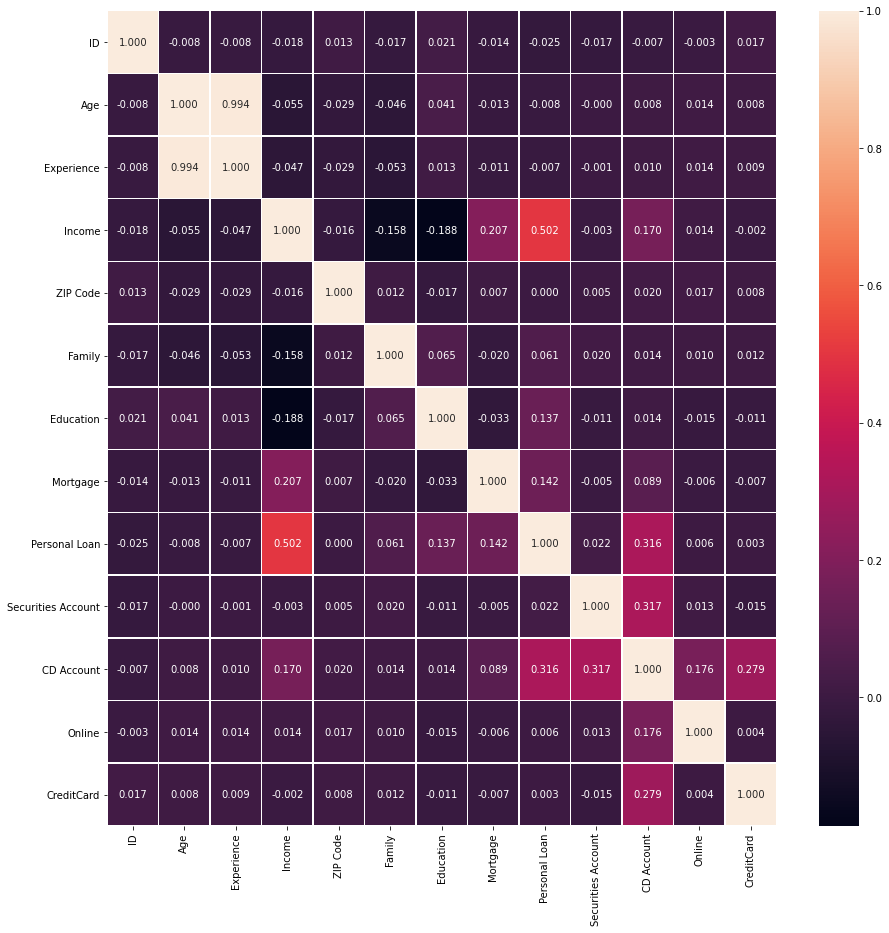

In [366]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, fmt=".3f")
plt.show()

<AxesSubplot:xlabel='variable', ylabel='index'>

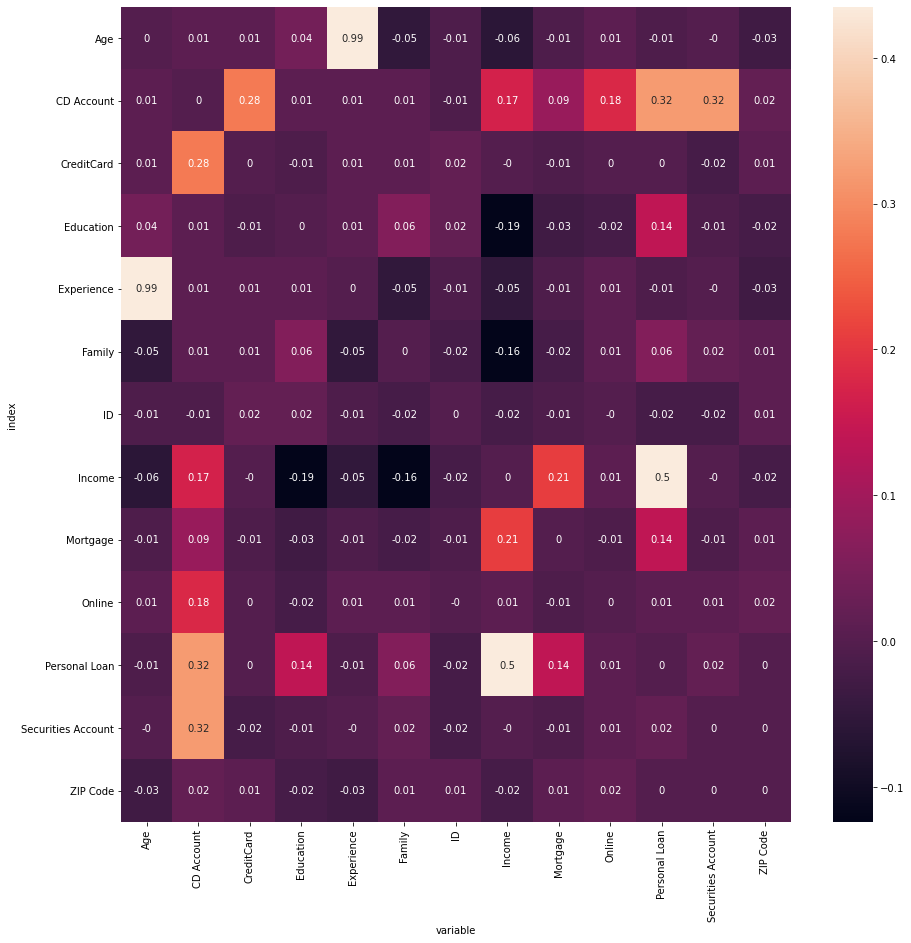

In [371]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(new_df_melt_no1.pivot(index='index', columns='variable', values='value').fillna(0).astype(float),ax=ax,annot=True,robust=True)

## 4. Logistinen regressio

Selvitä [datasta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) kaksi muuttujaa joilla on suurimmat lineaariset riippuvuudet muuttujan 'Personal Loan' välillä. Tee kuva, jossa olet esittänyt kahden em. muuttujan välistä riippuvuutta muuttujan 'Personal loan' välillä hajontakuviolla. Tee sitten vielä logistisen regression avulla malli, jossa selittävinä muuttujina ovat vuositulot ('Income') ja luottokorttikulutus ('CCAvg') sekä selitettävänä muuttujana lainapäätös ('Personal Loan'). Mitä voit sanoa logistisen regressiomallin avulla henkilön lainatarjouksen hyväksymisestä seuraavissa tilanteissa:
* Henkilön vuositulot ovat 50 000 \\$ ja luottokorttikulutus on 1000 \\$/kk.
* Henkilön vuositulot ovat 150 000 \\$ ja luottokorttikulutus on 4000 \\$/kk.

Voit antaa vastauksesi hyvin dokumentoidun koodin muodossa.

In [223]:
df=pd.read_csv('https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv', sep = ";")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
1,2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
2,3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
3,4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
4,5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


In [224]:
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [225]:
df['CCAvg'] = df['CCAvg'].str.replace(',','.')
df['CCAvg'] = df['CCAvg'].astype(float)

In [226]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [227]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Selvitä datasta kaksi muuttujaa joilla on suurimmat lineaariset riippuvuudet muuttujan 'Personal Loan' välillä. 

In [228]:
# Suurin lineaarinen riippuvuus on Income ja CD account
df.corrwith(df['Personal Loan'])

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
dtype: float64

#### Tee kuva, jossa olet esittänyt kahden em. muuttujan välistä riippuvuutta muuttujan 'Personal loan' välillä hajontakuviolla. 

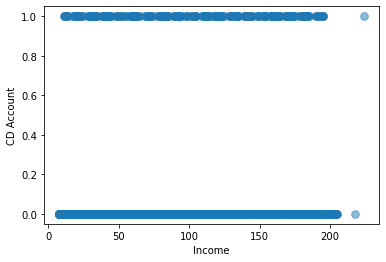

In [229]:
df.plot.scatter('Income', 'CD Account', s=60, alpha=0.5)
plt.show()

#### Tee sitten vielä logistisen regression avulla malli, jossa selittävinä muuttujina ovat vuositulot ('Income') ja luottokorttikulutus ('CCAvg') sekä selitettävänä muuttujana lainapäätös ('Personal Loan')

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
x = df[['Income','CCAvg']]

scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df['Personal Loan']

malli = LogisticRegression()
malli.fit(x,y)
print(malli)

LogisticRegression()


In [231]:
print(malli.predict(x))

[0 0 0 ... 0 0 0]


In [232]:
print(malli.predict(scaler.transform([[45000,45]])))

[1]


In [233]:
print(malli.predict_proba(scaler.transform([[45000,45]])))
print(malli.predict_proba(x)) # ennusteet kaikille riveille

[[0. 1.]]
[[0.98631481 0.01368519]
 [0.99194886 0.00805114]
 [0.99652433 0.00347567]
 ...
 [0.99475255 0.00524745]
 [0.98724421 0.01275579]
 [0.95806529 0.04193471]]


In [234]:
print(malli.score(x, y))

0.9072


In [235]:
from sklearn.metrics import confusion_matrix

y_pred = malli.predict(x) # ennusteet kaikille lähtöarvoille
print(confusion_matrix(y, y_pred)) # verrataan totetutuneita arvoja ennusteisin

[[4380  140]
 [ 324  156]]


In [236]:
print(malli.coef_)
print(malli.intercept_)

[[1.62549484 0.11322187]]
[-3.38087797]


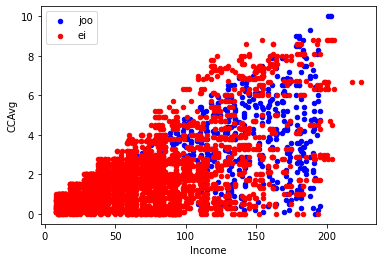

In [237]:
import matplotlib.pyplot as plt

tod_ostajat = df[df['Personal Loan']==1] 
tod_muut = df[df['Personal Loan']==0]

ax1 = tod_ostajat.plot.scatter('Income', 'CCAvg', color='b', label='joo')
tod_muut.plot.scatter('Income', 'CCAvg', ax=ax1, color='r', label='ei')

plt.show()

#### Mitä voit sanoa logistisen regressiomallin avulla henkilön lainatarjouksen hyväksymisestä seuraavissa tilanteissa:
Henkilön vuositulot ovat 50 000 dollaria ja luottokorttikulutus on 1000 dollaria/kk.
Henkilön vuositulot ovat 150 000 dollaria ja luottokorttikulutus on 4000 dollaria/kk.

## 5. Lainapäätös

Tee annetun [datan](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv) avulla päätöspuu, joka yrittää selittää asiakkaan päätöstä lainatarjouksesta ('Personal loan'). Asiakkaan lainatarjouksen hyväksymispäätöstä on merkitty arvolla 1 ja kieltäytymispäätöstä on merkitty arvolla 0. Aseta päätöspuun muodostamisessa (DecisionTreeClassifier) puun syvyydeksi (max_depth) arvo 4 ja datasettien (luennoilla: lokerot) jakokriteeriksi **ASM** heuristiikalla suurin informaatiosaanto.

Visualisoi päätöspuu export_graphviz funktion ja [Graphviz työkalua](http://dreampuf.github.io/GraphvizOnline/) hyödyntäen. Ilmoita vastauksessasi koodi, jolla olet tuottanut tehnyt em. päätöspuun ja tuottanut siitä export_graphviz funktiolla .dot muotoisen tiedoston visualisointia varten. 

Liitä myös vastauksesi kommentteihin mitä voit sanoa seuraavien henkilöiden päätöksestä hyväksyä lainatarjous:
* Henkilön vuosittaiset tulot ('Income') ovat 50 000 \\$ ja keskimääräinen luottokorttikulutus kuukaudessa ('CCAvg') on 1 000 \\$.
* Henkilön vuosittaiset tulot ovat 150 000 \$, koulutustaso ('Education') vastaa korkeakoulutasoa ('Advanced/Professional').
* Henkilön vuosittaiset tulot ovat 100 000 \$, koulutustaso ('Education') vastaa peruskoulutustasoa ('Undergrad') ja henkilön perheessä ('Family') on kolme henkilöä.

**Lisätietoa:** Päätöspuun muodostamisessa koko datasettiä jaetaan Attribute Selection Measure (**ASM**) heuristiikan avulla pienempiin datasetteihin, jotka yrittävät selittää selitettävää muuttujaa (**Personal loan**). Selvitä päätöspuun [dokumentaatiota](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) tutkimalla kuinka datasettejä voidaan jakaa osiin, jos tavoitteena on saavuttaa suurin informaatiosaanto (**information gain**).



#### Tee annetun datan avulla päätöspuu, joka yrittää selittää asiakkaan päätöstä lainatarjouksesta ('Personal loan'). 

In [310]:
from sklearn.tree import export_graphviz

In [311]:
df=pd.read_csv('https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta7/harjoitukset/Bank_loan.csv', sep = ";")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
1,2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
2,3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
3,4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
4,5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


#### Datan käsittely ja puhdistaminen

In [312]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
1,2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
2,3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
3,4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
4,5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [314]:
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                 object
Education              int64
Mortgage               int64
Personal Loan          int64
Securities Account     int64
CD Account             int64
Online                 int64
CreditCard             int64
dtype: object

In [315]:
df['CCAvg'] = df['CCAvg'].str.replace(',','.')

In [316]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [317]:
df['CCAvg'] = df['CCAvg'].astype(float)
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [318]:
df=df.drop(['ID'], axis=1)

In [319]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [320]:
print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())

Puuttuvien arvojen lukumäärä per muuttuja:
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


#### Päätöspuu kaikilla muuttujilla

In [321]:
# Irrotetaan ennustettava muuttuja datasta
y = df["Personal Loan"]
x = df.drop("Personal Loan", axis=1)
# Osa tulevista komennoista sisältää satunnaisuutta. Valitaan luku, jolla alustetaan
# satunnaislukugeneraattorit, jotta voimme saada myöhemmin samat tulokset, kun toistamme analyysin.
seed = 12345

# Jaetaan data opetus- ja testidataan.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

In [322]:
#Opetetaan koneoppimismalli ja testataan kuinka hyvin se toimii datalla, jota se ei ole nähnyt
model = DecisionTreeClassifier(random_state=seed)
model.fit(x_train, y_train)

print("Test accuracy: %.2f" % model.score(x_test, y_test))

Test accuracy: 0.99


In [323]:
#Ei hyväksyneistä 897 ennustetaan, että ei hyväksynyt tarjousta ja heistä 7 ennustettiin että hyväksyi tarjouksen
#Hyväksyinestiä 4 ennustettiin, että ei hyväksynyt ja 92 ennustettiin, että hyväksyi
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

print(confusion_matrix(y_test, y_pred)) # verrataan totetutuneita arvoja ennusteisin

[[897   7]
 [  4  92]]


In [324]:
#Kaikista eniten mallin ennustuksiin vaikuttaa Education, Income ja Family
importances = model.feature_importances_
for i in range(len(importances)):
    print("feature: %12s - relative importance: %4.1f %%" % (x.columns[i], importances[i] * 100))

feature:          Age - relative importance:  0.8 %
feature:   Experience - relative importance:  2.4 %
feature:       Income - relative importance: 29.3 %
feature:     ZIP Code - relative importance:  1.6 %
feature:       Family - relative importance: 15.0 %
feature:        CCAvg - relative importance:  6.5 %
feature:    Education - relative importance: 41.3 %
feature:     Mortgage - relative importance:  0.7 %
feature: Securities Account - relative importance:  0.0 %
feature:   CD Account - relative importance:  1.3 %
feature:       Online - relative importance:  0.5 %
feature:   CreditCard - relative importance:  0.7 %


In [325]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=seed)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print("Test accuracy: %.2f" % model2.score(x_test, y_test))
print(confusion_matrix(y_test, y_pred2))

export_graphviz(decision_tree=model2, out_file="model2.dot",
                feature_names=x.columns, class_names=True, filled=True, rounded=True)

Test accuracy: 0.99
[[900   4]
 [  6  90]]


#### Päätöspuu Income ja Education muuttujilla

In [326]:
from sklearn.tree import DecisionTreeClassifier 

x = df[['Income','Education']]
y = df['Personal Loan']

# luodaan malli-olio
malli = DecisionTreeClassifier()

# sovitetetaan, eli generoidaan päätöspuu
malli.fit(x,y)

# ennustetaan tulokset
y_pred = malli.predict(x)

# katsotaan tarkkuus
print("Accuracy:",malli.score(x,y))

Accuracy: 0.9674
